In [1]:
import numpy as np
from scipy import optimize
import math
import matplotlib.pyplot as plt

In [21]:
# utility function
def utility(x):
    return np.sqrt(x)

# ransom, R
def ransom(N, N_bar):
    return 5000 + 2000/(N+1) - 2000

# insurance premium, P
def premium(p, R):
    return p*R

# probability of death, q
def p_death(N):
    return N / (100+N)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


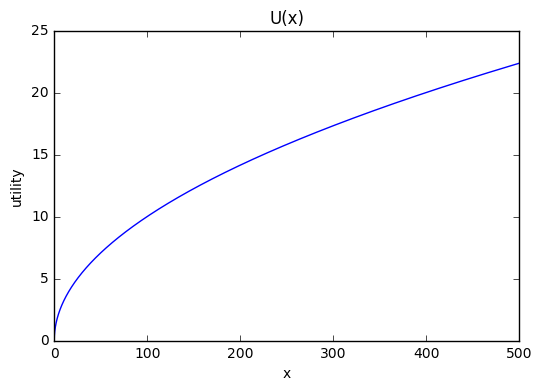

In [3]:
# utility function properties

x = np.arange(0, 500, 0.01)
u_y = utility(x)
plt.plot(x, u_y)
plt.title('U(x)')
plt.xlabel('x')
plt.ylabel('utility')
plt.show()

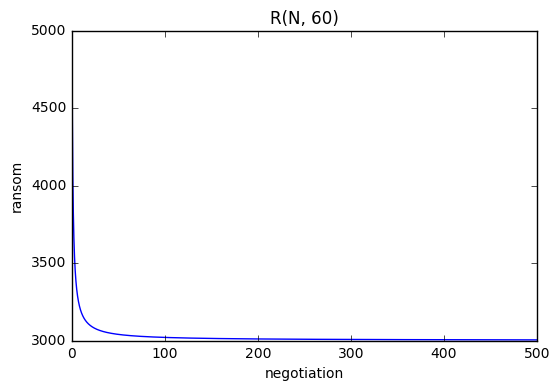

In [4]:
# ransom function properties
# 

r_y = ransom(x, 30)
plt.plot(x, r_y)
plt.title('R(N, 60)')
plt.ylabel('ransom')
plt.xlabel('negotiation')
plt.axis([0, 500, 90, 100])
plt.show()

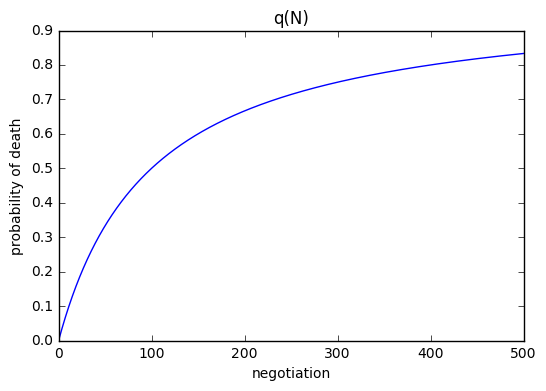

In [5]:
# death function properties

d_y = p_death(x)
plt.plot(x, d_y)
plt.title('q(N)')
plt.xlabel('negotiation')
plt.ylabel('probability of death')
plt.show()


In [40]:
# expected utility function with p, W, D, K, N, N_bar as exogenous variables
xvals = np.arange(0, 500, .01)

def expected_utility(p, W, D, K, N, N_bar):
    P = premium(p, ransom(N, N_bar))
    return (1-p)*utility(W-P) + \
            p*p_death(N)*utility(W-P-D) + \
            p*(1-p_death(N))*utility(W-P-K)

In [57]:
# setting exogenous variables
p = .05
W = 10000
D = 9000
K = 3000
N_bar = 100

# function of N
def U(N):
    return expected_utility(p, W, D, K, N, N_bar)

In [43]:
U(50)

('premiums', 151.95000000000002)


ValueError: x and y must have same first dimension

('premiums', array([ 250.        ,  249.00990099,  248.03921569, ...,  150.19961275,
        150.19960877,  150.19960478]))


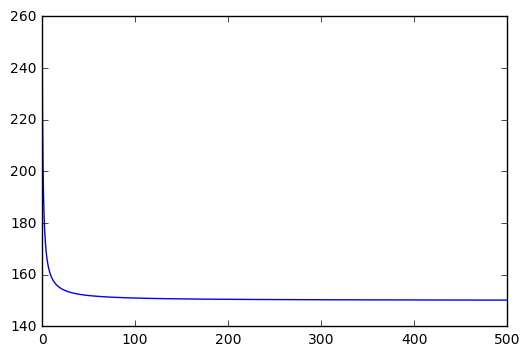

[ 97.91290306  97.91769331  97.92238419 ...,  96.18820988  96.18820246
  96.18819503]


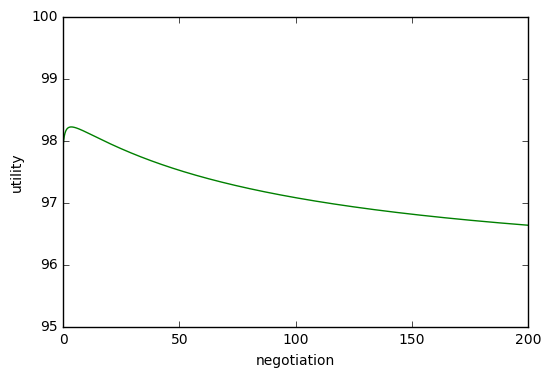

In [64]:
# plot function

yvals = U(xvals)
print(yvals)
plt.plot(xvals, yvals)
plt.xlabel('negotiation')
plt.ylabel('utility')
plt.axis([0, 200, 95, 100])
plt.show()

In [10]:
# recursive search for min 
# TODO clean function

def search_routine(low, high, mid, func):
    left_mid = low + (mid-low) / 2
    right_mid = mid + (mid-high) / 2
    if func(left_mid) < func(right_mid):
        return search_routine(low, mid, func)
    elif func(left_mid) > func(right_mid):
        return search_routine(mid, high, func)

def find_min(low, high, func):
    # find abs value of difference between high and mid
    # return mid if the 
    routine(low, high, low + (high-low)/2, func)

In [24]:
result = optimize.minimize_scalar(U)
result

('premium', 750.0)
('W-P', 9250.0)
('W-P-D', 8750.0)
('W-P-K', 8950.0)
('premium', 600.0)
('W-P', 9400.0)
('W-P-D', 8900.0)
('W-P-K', 9100.0)
('premium', -35.41018778902132)
('W-P', 10035.41018778902)
('W-P-D', 9535.41018778902)
('W-P-K', 9735.41018778902)
('premium', 750.0)
('W-P', 9250.0)
('W-P-D', 8750.0)
('W-P-K', 8950.0)
('premium', 1235.4101680312433)
('W-P', 8764.589831968757)
('W-P-D', 8264.589831968757)
('W-P-K', 8464.589831968757)
('premium', 19296000979.960934)
('W-P', -19295990979.960934)
('W-P-D', -19295991479.960934)
('W-P-K', -19295991279.960934)
('premium', -820.8204592733429)
('W-P', 10820.820459273344)
('W-P-D', 10320.820459273344)
('W-P-K', 10520.820459273344)
('premium', -335.4102122109803)
('W-P', 10335.41021221098)
('W-P-D', 9835.41021221098)
('W-P-K', 10035.41021221098)
('premium', -185.41020072065598)
('W-P', 10185.410200720657)
('W-P-D', 9685.410200720657)
('W-P-K', 9885.410200720657)
('premium', -96.700328658416467)
('W-P', 10096.700328658417)
('W-P-D', 9596.7

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


  fun: 99.953101029148826
 nfev: 38
  nit: 37
    x: -1.6180339636992351

In [ ]:

# literature review-- if another student were to pick up trail, write summary of lit review
# get data for explanatory stuff